In [1]:
from ego_solver import EGO
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib notebook
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)


In [2]:
obj_name='branin'
file_address = 'solution_obj_name_'+obj_name+'_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

solution = np.array(dat['solution'])
print solution.shape
solution[0,0,1].shape

(30L, 4L, 2L)


(100L,)

<IPython.core.display.Javascript object>


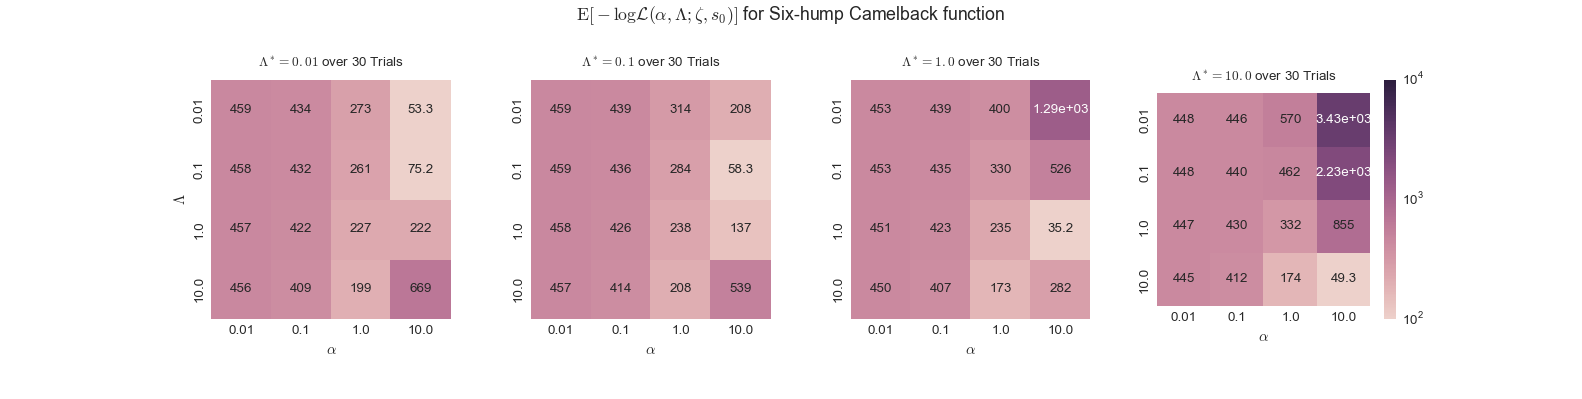

53.3291333333 669.388333333
58.3395666667 539.318
35.2339666667 1286.83153333
49.2889 3429.22


In [86]:
sig_scale = np.array([0.01, 0.1, 1., 10.])
alpha_set = np.array([0.01, 0.1, 1., 10.])
# alpha_set = np.array([1e-5, 1e-4, 1e-3, 1e-2])

# data = np.loadtxt('all_10_trials_branin.txt').reshape((30,4,4))

c_m = sns.cubehelix_palette(as_cmap=True)

norm = colors.LogNorm(vmin=100., vmax=10000.)
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
#     norm.autoscale(X)
s_m.set_array([])


import matplotlib.colors as colors
import matplotlib.cm

def heat_plot(data, sig, ax=None):
    if ax is None:
        f, ax = plt.subplots( figsize=(12,4))
    X = -data.mean(axis=0)
    print np.min(X), np.max(X)
    
    
    
    hmap = sns.heatmap(X,
                xticklabels=alpha_set, yticklabels=sig_scale, cmap=c_m, 
               robust=False, annot=True, ax=ax, square=True, cbar=False,
                annot_kws={"size": 12}, fmt='.3g', norm=norm, vmin=100., vmax=10000)
    ax.set_xlabel(r'$\alpha$')
    
#     ax[0].set_title(r'$\mathrm{E}[-\log {\cal L}(\Sigma^{-1}_{test}|\Sigma^{-1},\alpha)]$')

#     for y in range(data.mean(axis=0).shape[0]):
#         for x in range(data.mean(axis=0).shape[1]):
#             ax.text(x + 0.5, y + 0.2, '[ {:.1e} ]'.format( data.std(axis=0)[-y-1, x]),
#                      horizontalalignment='center',
#                      verticalalignment='center', color='gray'
#                      )
    
    # f.suptitle('BO Paramter estimation for Branin \n True $\Sigma^{-1}=0.01$ over 30 Trials', 
    #            y=1.1, fontsize=12)
    ax.set_title('$\Lambda^*='+str(sig)+'$ over 30 Trials', 
               y=1.03, fontsize=12)
# cbar_ax = f.axes[-1]
# cbar_ax.set_ylabel('-log likelihood')
# plt.showw()
names=['001','01','1','10']





f,ax = plt.subplots(ncols=4, figsize=(21,5))
for n,i in enumerate(names):
    data = np.loadtxt('all_'+i+'_trials_sixmin.txt').reshape((30,4,4))
    heat_plot(data, sig_scale[n], ax=ax[n])
title=r'$\mathrm{E}[-\log {\cal L}(\alpha,\Lambda;\zeta,s_0)]$'+\
               ' for Six-hump Camelback function'

f.get_axes()[0].annotate(title, (0.5, 0.95), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
f.get_axes()[0].set_ylabel(r'$\Lambda$')
f.colorbar(s_m)
plt.subplots_adjust(top=0.8, bottom=.2)
plt.subplots_adjust()
# plt.tight_layout()


TypeError: 'ListedColormap' object is not iterable

In [ ]:
np.nan_to_num(-all_01_trials_branin)[:,:,:-1].mean(axis=0)

In [ ]:
np.savetxt('all_01_trials_branin.txt', 
           all_01_trials_branin[:,:,:-1], fmt='%.4e')

(30L, 4L, 2L)
(2883L, 6L)


<IPython.core.display.Javascript object>


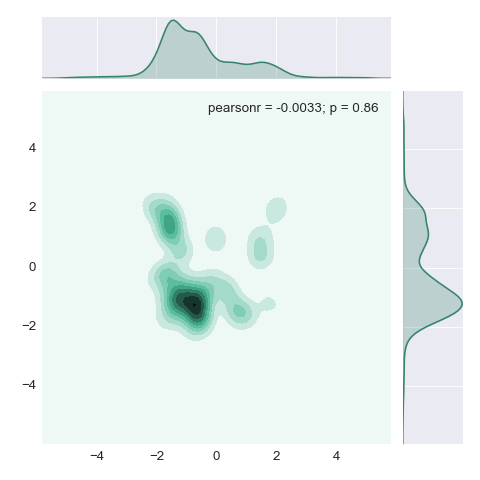

<IPython.core.display.Javascript object>


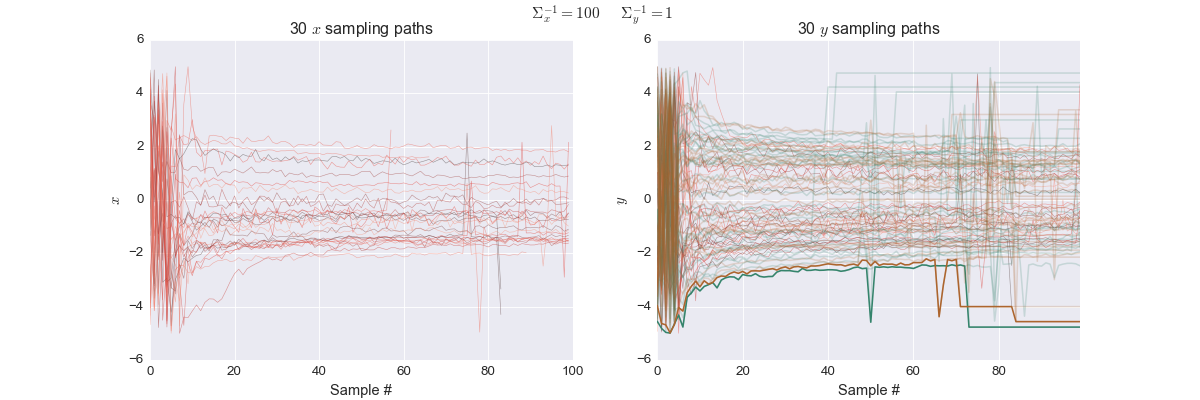

In [25]:
file_address = 'solution_obj_name_rosenbrock-6dim_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,1,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
print X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=100$', y=1.05, fontsize=13)

# plt.plot(solution[0,0,0])
def hairplot(solution,sig):
    
    with sns.color_palette('Reds_d', n_colors=30):
        fig,ax=plt.subplots(ncols=2, figsize=(15,5))
        for i in range(1,30):
            ax[0].plot(solution[i,0,0][:,0], lw=0.5, alpha=.5)
            ax[1].plot(solution[i,0,0][:,1], lw=0.5, alpha=.5)
        ax[0].set_title('30 $x$ sampling paths')
        ax[1].set_title('30 $y$ sampling paths')
        fig.suptitle('BO Sample paths for $f(x)=x^2+y^2$\n $\Sigma^{-1}_x='+str(sig)+'$'+\
                     '\t $\Sigma^{-1}_y=1$',
                     fontsize=14, y=1.05)
        ax[0].set_ylabel('$x$')
        ax[0].set_xlabel('Sample #')
        ax[1].set_ylabel('$y$')
        ax[1].set_xlabel('Sample #')
hairplot(solution,100)

<IPython.core.display.Javascript object>


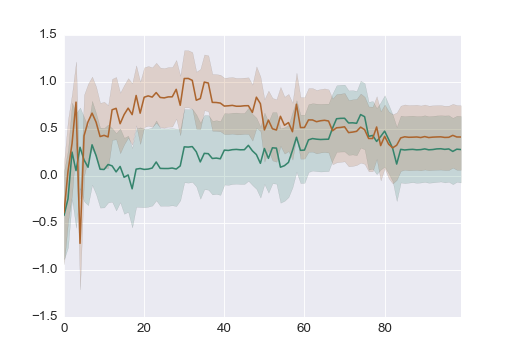

In [33]:
timesx = np.zeros((30,100))
timesy = np.zeros((30,100))
for i in range(30):
    pathx = solution[i,3,0][:,0]
    pathy = solution[i,3,0][:,1]
    
    timesx[i, :pathx.size] = pathx
    timesx[i, pathx.size:] = np.ones(100-pathx.size)*pathx[-1]
    
    timesy[i, :pathy.size] = pathy
    timesy[i, pathy.size:] = np.ones(100-pathy.size)*pathy[-1]
    
sns.tsplot(timesx, err_style=['ci_band'], color=pal[0])
sns.tsplot(timesy, err_style=['ci_band'], color=pal[1])
# sns.tsplot(times, ci=[68,99.7])
